In [1]:
import os

import itertools
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import ml_insights as mli
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir = os.path.join(os.path.realpath('.'), '..')
df_train = pd.read_csv(os.path.join(datadir, 'train_data.csv'))
df_test = pd.read_csv(os.path.join(datadir, 'test_data.csv'))

In [3]:
estimator = LogisticRegressionCV()

In [4]:
estimator.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [5]:
accuracy_score(df_test.iloc[:, -1], estimator.predict(df_test.iloc[:, :-1]))

0.74558604552222929

In [6]:
xray = mli.ModelXRay(model=estimator, data=df_test.iloc[:, :-1])

array([   8, 4461, 1939, 4700, 2245, 1208, 3547])

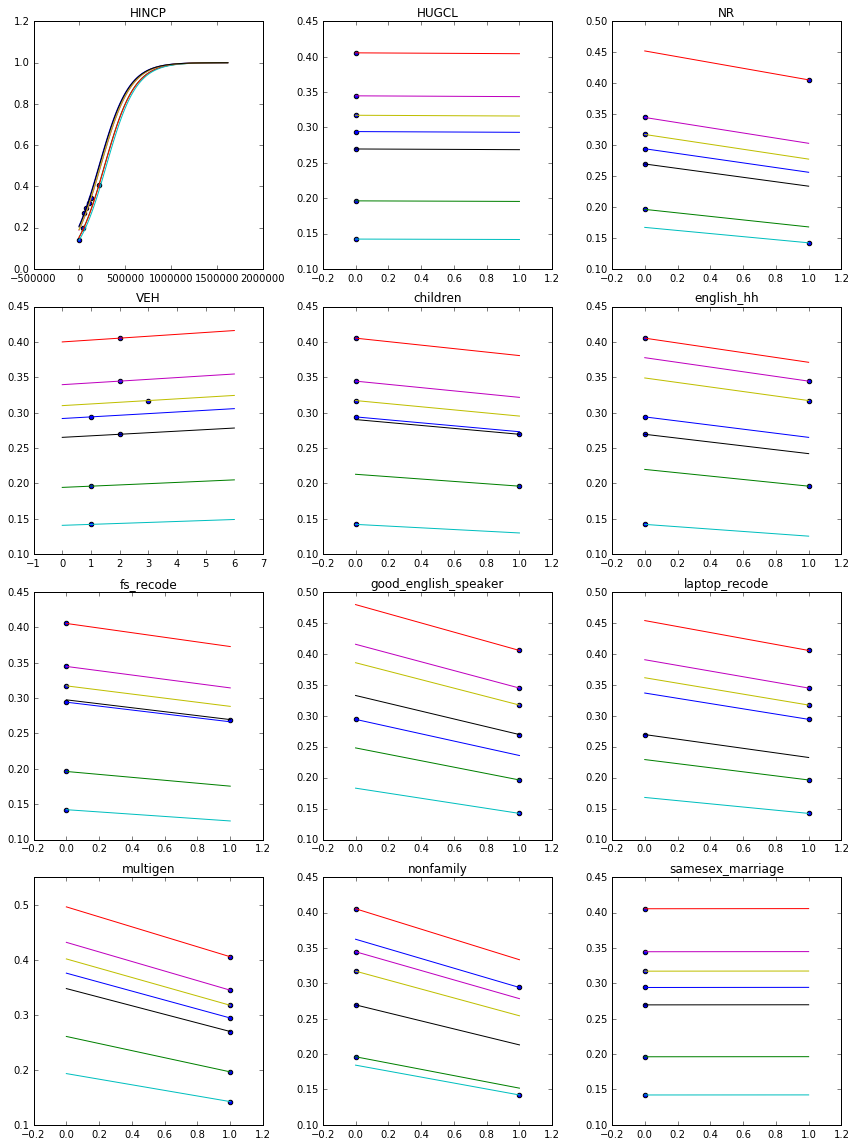

In [7]:
xray.feature_dependence_plots(num_pts=7)

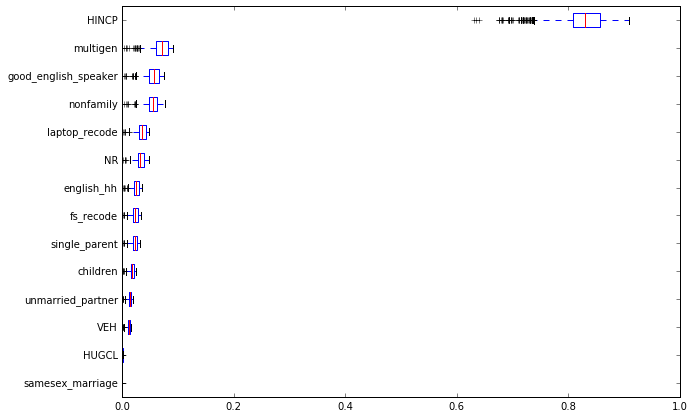

In [8]:
xray.feature_effect_summary()

In [9]:
xray.explain_prediction_difference(0, 2, tol=0.05)

Your initial point has a target value of 0.1467
Your final point has a target value of 0.2595
Changing HINCP from 6000.0 to 120000.0
		changes your target by 0.1106 to 0.2573
----------
Tolerance of 0.05 reached
Current value of 0.2573 is within 5.0% of 0.2595


(['HINCP'],
 [(6000.0, 120000.0)],
 [0.11060771809861358],
 [0.14673245239896099, 0.25734017049757457])